# Logistic regression
```



In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

import matplotlib.pyplot as plt

from torch.utils.data import Dataset
from torch.utils.data import DataLoader


def readDataset(file_path, features_labels_to_drop):

  # reading the csvs
  dataset = pd.read_csv(file_path)

  features = dataset.drop(features_labels_to_drop, axis=1).to_numpy()
  features_torch = torch.from_numpy(features).to(torch.float32)

  labels = dataset["label"].to_numpy()
  labels_torch= torch.unsqueeze(torch.from_numpy(labels).to(torch.float32), 1)

  return features_torch, labels_torch



###########################
# Creating the dataloaders class
###########################

class newDataset(Dataset):
    def __init__(self, features, labels):
        self.data = features
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

###########################
# Creating a logistic regression model with Pytorch
###########################

class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        x = self.linear(x)
        x = torch.sigmoid(x)
        return x

###########################
# Define training procedure
###########################
def train(epoch, model):

    loss_per_epoch = 0
    correct_per_epoch = 0
    total_inputs_per_epoch = 0

    # set the model to training mode
    model.train()

    for batch_idx, (inputs, targets) in enumerate(training_dataLoader):
        # Clear gradient
        optimizer.zero_grad()

        # Forward pass batch through model
        outputs = model(inputs)

        # Calculate loss on batch (mean for this batch)
        loss = criterion(outputs, targets)
        # Calculate gradients for backward pass
        loss.backward()

        # Update model
        optimizer.step()

        loss_per_epoch += loss.item()
        total_inputs_per_epoch += targets.size(0)

        outputs_class = torch.zeros(targets.shape)
        outputs_class[outputs>=0.5] = 1
        correct_per_epoch += torch.sum(outputs_class==targets)


    epoch_loss = loss_per_epoch/len(training_dataLoader)
    accuracy_epoch = 100.*correct_per_epoch/total_inputs_per_epoch

    return epoch_loss, accuracy_epoch.item()


###########################
# Define testing procedure
###########################
def test(epoch, model):
    #print('Epoch: %d' % epoch)
    losses = [] # needed for visualize the traning loss
    model.eval()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(testing_dataLoader):
        # Forward pass batch through model
        outputs = model(inputs)

        # Calculate loss on batch
        loss = criterion(outputs, targets)
        train_loss += loss.item()

        total += targets.size(0)
        outputs_class = torch.zeros(targets.shape)
        outputs_class[outputs>=0.5] = 1
        correct += torch.sum(outputs_class==targets)

    #print(total)
    epoch_loss = train_loss/len(testing_dataLoader)
    accuracy_epoch = 100.*correct/total

    return epoch_loss, accuracy_epoch.item()


# Create the dataloaders

batch size defined here


In [3]:
filePath_training = "./datasets/training_dataset.csv"
filePath_testing = "./datasets/testing_dataset.csv"

drop_features_and_labels = ['attack_cat', "label"]

X_training, y_training = readDataset(filePath_training, drop_features_and_labels)
X_testing, y_testing = readDataset(filePath_testing, drop_features_and_labels)



# Defining batch size to create data loaders
batch_size = 16
training_dataset_object = newDataset(X_training, y_training)
training_dataLoader = DataLoader(training_dataset_object, batch_size=batch_size)

testing_dataset_object = newDataset(X_testing, y_testing)
testing_dataLoader = DataLoader(testing_dataset_object, batch_size=batch_size)

# Train first model

Parameters:


In [4]:
lr1 = 0.001
epochs = 20

model_lr1 = LogisticRegression(input_dim = X_training.shape[1])

criterion = nn.BCELoss()
optimizer = optim.SGD(model_lr1.parameters(), lr=lr1)


training_losses_lr1 = []
training_accs_lr1 = []
testing_losses_lr1 = []
testing_accs_lr1 = []

for epoch in range(epochs):

    loss_train, acc_train = train(epoch, model_lr1)
    training_losses_lr1.append(loss_train)
    training_accs_lr1.append(acc_train)

    loss_testing, acc_testing = test(epoch, model_lr1)
    testing_losses_lr1.append(loss_testing)
    testing_accs_lr1.append(acc_testing)

    print('Epoch: %d' % epoch + " Done   |   Training - loss: " + f"{loss_train:.3f}" +
          " acc: " + f"{acc_train:.3f}" + "   | Testing - loss: " + f"{loss_testing:.3f}" +
          " acc: " + f"{acc_testing:.3f}")


Epoch: 0 Done   |   Training - loss: 0.531 acc: 72.620   | Testing - loss: 0.479 acc: 73.590
Epoch: 1 Done   |   Training - loss: 0.454 acc: 74.175   | Testing - loss: 0.440 acc: 76.398
Epoch: 2 Done   |   Training - loss: 0.425 acc: 78.168   | Testing - loss: 0.419 acc: 80.866
Epoch: 3 Done   |   Training - loss: 0.408 acc: 81.324   | Testing - loss: 0.404 acc: 81.190
Epoch: 4 Done   |   Training - loss: 0.395 acc: 81.370   | Testing - loss: 0.394 acc: 81.211
Epoch: 5 Done   |   Training - loss: 0.386 acc: 81.412   | Testing - loss: 0.386 acc: 81.252
Epoch: 6 Done   |   Training - loss: 0.379 acc: 81.482   | Testing - loss: 0.379 acc: 81.355
Epoch: 7 Done   |   Training - loss: 0.372 acc: 81.654   | Testing - loss: 0.373 acc: 81.587
Epoch: 8 Done   |   Training - loss: 0.367 acc: 82.013   | Testing - loss: 0.368 acc: 82.028
Epoch: 9 Done   |   Training - loss: 0.362 acc: 82.501   | Testing - loss: 0.364 acc: 82.562
Epoch: 10 Done   |   Training - loss: 0.358 acc: 83.145   | Testing - 

# Train second model

Parameters:


In [6]:
lr2 = 0.01
epochs = 20

model_lr2 = LogisticRegression(input_dim = X_training.shape[1])

criterion = nn.BCELoss()
optimizer = optim.SGD(model_lr2.parameters(), lr=lr2)



training_losses_lr2 = []
training_accs_lr2 = []
testing_losses_lr2 = []
testing_accs_lr2 = []

for epoch in range(epochs):

    loss_train, acc_train = train(epoch, model_lr2)
    training_losses_lr2.append(loss_train)
    training_accs_lr2.append(acc_train)

    loss_testing, acc_testing = test(epoch, model_lr2)
    testing_losses_lr2.append(loss_testing)
    testing_accs_lr2.append(acc_testing)

    print('Epoch: %d' % epoch + " Done   |   Training - loss: " + f"{loss_train:.3f}" +
          " acc: " + f"{acc_train:.3f}" + "   | Testing - loss: " + f"{loss_testing:.3f}" +
          " acc: " + f"{acc_testing:.3f}")

Epoch: 0 Done   |   Training - loss: 0.403 acc: 80.406   | Testing - loss: 0.362 acc: 82.292
Epoch: 1 Done   |   Training - loss: 0.341 acc: 84.841   | Testing - loss: 0.332 acc: 85.546
Epoch: 2 Done   |   Training - loss: 0.318 acc: 87.266   | Testing - loss: 0.314 acc: 87.141
Epoch: 3 Done   |   Training - loss: 0.303 acc: 88.299   | Testing - loss: 0.301 acc: 88.017
Epoch: 4 Done   |   Training - loss: 0.293 acc: 88.727   | Testing - loss: 0.292 acc: 88.459
Epoch: 5 Done   |   Training - loss: 0.285 acc: 88.827   | Testing - loss: 0.285 acc: 88.533
Epoch: 6 Done   |   Training - loss: 0.279 acc: 88.863   | Testing - loss: 0.280 acc: 88.564
Epoch: 7 Done   |   Training - loss: 0.274 acc: 88.852   | Testing - loss: 0.275 acc: 88.595
Epoch: 8 Done   |   Training - loss: 0.270 acc: 88.841   | Testing - loss: 0.272 acc: 88.581
Epoch: 9 Done   |   Training - loss: 0.266 acc: 88.805   | Testing - loss: 0.269 acc: 88.556
Epoch: 10 Done   |   Training - loss: 0.263 acc: 88.774   | Testing - 

# Train third model

Parameters:


In [7]:
lr3 = 0.1
epochs = 20

model_lr3 = LogisticRegression(input_dim = X_training.shape[1])

criterion = nn.BCELoss()
optimizer = optim.SGD(model_lr3.parameters(), lr=lr3)



training_losses_lr3 = []
training_accs_lr3 = []
testing_losses_lr3 = []
testing_accs_lr3 = []

for epoch in range(epochs):

    # training
    loss_train, acc_train = train(epoch, model_lr3)
    training_losses_lr3.append(loss_train)
    training_accs_lr3.append(acc_train)

    loss_testing, acc_testing = test(epoch, model_lr3)
    testing_losses_lr3.append(loss_testing)
    testing_accs_lr3.append(acc_testing)

    print('Epoch: %d' % epoch + " Done   |   Training - loss: " + f"{loss_train:.3f}" +
          " acc: " + f"{acc_train:.3f}" + "   | Testing - loss: " + f"{loss_testing:.3f}" +
          " acc: " + f"{acc_testing:.3f}")

Epoch: 0 Done   |   Training - loss: 0.305 acc: 87.213   | Testing - loss: 0.269 acc: 88.581
Epoch: 1 Done   |   Training - loss: 0.256 acc: 88.863   | Testing - loss: 0.252 acc: 89.241
Epoch: 2 Done   |   Training - loss: 0.245 acc: 89.111   | Testing - loss: 0.245 acc: 89.689
Epoch: 3 Done   |   Training - loss: 0.240 acc: 89.363   | Testing - loss: 0.241 acc: 89.779
Epoch: 4 Done   |   Training - loss: 0.236 acc: 89.511   | Testing - loss: 0.238 acc: 89.821
Epoch: 5 Done   |   Training - loss: 0.234 acc: 89.682   | Testing - loss: 0.236 acc: 89.889
Epoch: 6 Done   |   Training - loss: 0.232 acc: 89.794   | Testing - loss: 0.234 acc: 89.984
Epoch: 7 Done   |   Training - loss: 0.230 acc: 89.900   | Testing - loss: 0.232 acc: 90.097
Epoch: 8 Done   |   Training - loss: 0.229 acc: 89.980   | Testing - loss: 0.231 acc: 90.159
Epoch: 9 Done   |   Training - loss: 0.228 acc: 90.051   | Testing - loss: 0.230 acc: 90.229
Epoch: 10 Done   |   Training - loss: 0.228 acc: 90.087   | Testing - 

# Plot results

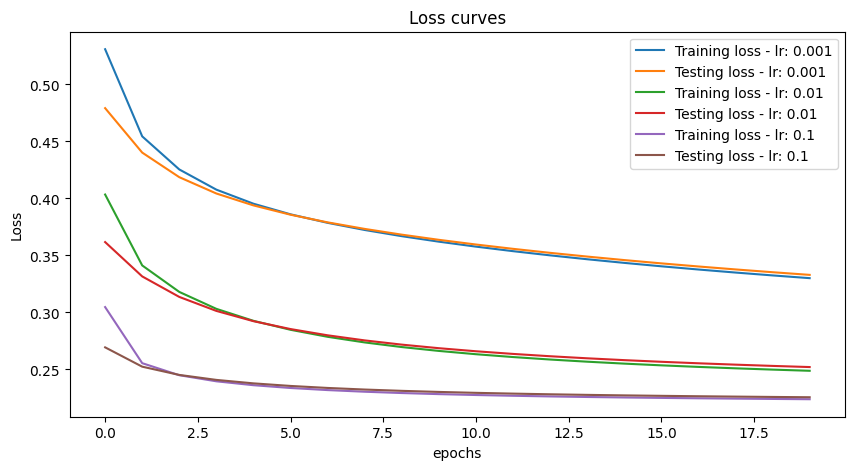

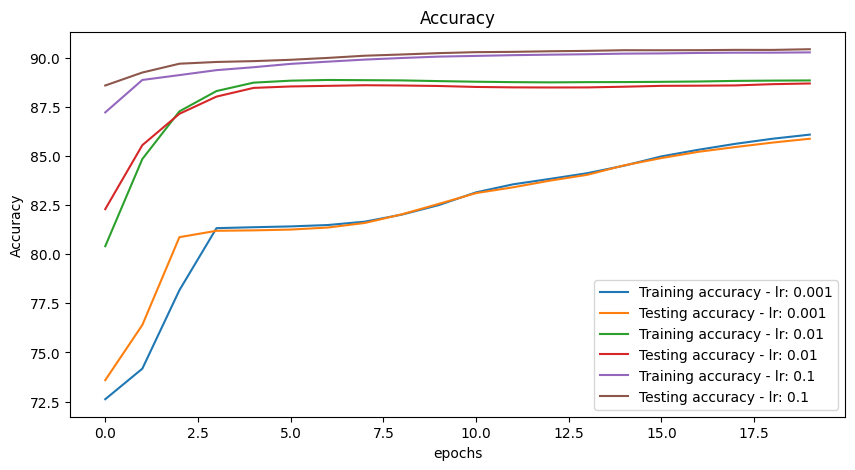

In [8]:

plt.figure(figsize=(10,5))
ax = plt.gca()
plt.plot(training_losses_lr1, label="Training loss - lr: "+str(lr1))
plt.plot(testing_losses_lr1, label="Testing loss - lr: "+str(lr1))
plt.plot(training_losses_lr2, label="Training loss - lr: "+str(lr2))
plt.plot(testing_losses_lr2, label="Testing loss - lr: "+str(lr2))
plt.plot(training_losses_lr3, label="Training loss - lr: "+str(lr3))
plt.plot(testing_losses_lr3, label="Testing loss - lr: "+str(lr3))
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss curves")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
ax = plt.gca()
plt.plot(training_accs_lr1, label="Training accuracy - lr: "+str(lr1))
plt.plot(testing_accs_lr1, label="Testing accuracy - lr: "+str(lr1))
plt.plot(training_accs_lr2, label="Training accuracy - lr: "+str(lr2))
plt.plot(testing_accs_lr2, label="Testing accuracy - lr: "+str(lr2))
plt.plot(training_accs_lr3, label="Training accuracy - lr: "+str(lr3))
plt.plot(testing_accs_lr3, label="Testing accuracy - lr: "+str(lr3))
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

# Features selection


Using the model that achieved a higher testing accuracy and considering the explainability of the logistic regression. The least relevant features are identifiend and dropped.

In [17]:
for name, param in model_lr3.named_parameters():
    if param.requires_grad:
        print(name, param.data)
        if name == "linear.weight":
          print(name)
          parameters = param.data


abs_parameters = torch.abs(parameters)
sum_parameters = torch.sum(abs_parameters)
percentages_parameters = torch.squeeze(100*abs_parameters / sum_parameters)
idx_features_to_keep = (percentages_parameters >0.8).numpy()


filePath_testing = "./datasets/testing_dataset.csv"
dataset = pd.read_csv(filePath_testing)

dataset_labels = ['attack_cat', "label"]
features = dataset.drop(dataset_labels, axis=1)

print(idx_features_to_keep)

print("\nFeatures to keep: ")
print(features.columns[idx_features_to_keep])

print("\nFeatures to drop: ")
print(features.columns[idx_features_to_keep==False])

print("\nPercentage of the sum of Eigen values that is kept is: "
      + str(sum(percentages_parameters[idx_features_to_keep])))

linear.weight tensor([[  2.3656,  16.2794,  -9.8672,   1.6772,   0.0229,   1.3038,  -0.5780,
           0.7491,  11.1555,  -3.7807,  -5.3556,   1.8497,  -0.4341,  -4.2378,
          -0.3683,  -0.9660,   0.4500, -10.1137,   0.0236,   0.0183,  -0.2073,
          -8.0545,  -7.8464,  -1.8513,   0.4636,   8.5022,   0.7845,  -0.4022,
          -1.1382,  10.2448,  -0.3083,   4.3029,  15.1885,  -2.5860,   1.5646,
          -1.7983,  -0.4352,  -1.5821,  -5.3142]])
linear.weight
linear.bias tensor([-1.5342])
[ True  True  True  True False  True False False  True  True  True  True
 False  True False False False  True False False False  True  True  True
 False  True False False False  True False  True  True  True  True  True
 False  True  True]

Features to keep: 
Index(['dur', 'proto', 'state', 'spkts', 'sbytes', 'dttl', 'sload', 'dload',
       'sloss', 'sinpkt', 'swin', 'tcprtt', 'synack', 'ackdat', 'dmean',
       'ct_state_ttl', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm',